# Table of contents
## Install Monk Object Detection Library
##  Download Drive- U Dataset
## To save images in one folder
## code to make the dataset in required format
## Run Training
## Inference

# Install Monk Object Detection Library

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [1]:
# For colab use the command below
#! cd Monk_Object_Detection/12_tf_obj_1/installation && chmod +x install_colab.sh && ./install_colab.sh
# Restart colab runtime now

# For Local systems and cloud select the right CUDA version
! cd Monk_Object_Detection/12_tf_obj_1/installation && chmod +x install_cuda10.sh && ./install_cuda10.sh

You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' c

You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.


You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python3.6 -m pip install --upgrade pip' command.
Processing /home/ubuntu/Monk_Object_Detection/12_tf_obj_1/lib/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1545497 sha256=8ae6eaf93bef7cd69fcdc36172577aaf60d9641ed7d0eb836106edef7c9887fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-0tn9ph4t/wheels/f9/95/fd/8af28cd9211ebdb2911dc60bdd3dd39c9a8d36c4f46e0353e9
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1
You should consider upgrading via the '/home/ubuntu/.virtualenvs/my_venv/bin/python -m pip install --upgrade pip' command.


# Drive- U Dataset is available on this link 
https://www.uni-ulm.de/en/in/driveu/projects/driveu-traffic-light-dataset/

In [1]:
import os
import cv2
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wand.image import Image

# To save images in one folder

In [ ]:
source="DTLD/cities/"
dest="train/"

In [ ]:
for folders, subfolders, filenames in os.walk(source):
    for filename in filenames:
        if filename.find('native')<0:
            shutil.move(os.path.join(folders, filename), dest)
            

## Dataset required - in Pascal VOC format
parent_dir
    |
    
    |---------train
                |
                |--------images
                            |
                            |--------img1.jpg
                            |--------img2.jpg
                            |--------....(And so on)
                |
                |---------annotations
                            |
                            |--------img1.xml
                            |--------img2.xml
                            |--------....(And so on)

# Below code will make the dataset in required format

# To convert image from .tiff format to .jpg

In [ ]:
directory=os.listdir('drive/train')

In [ ]:
for i in directory:
    with Image(filename ='drive/train/'+i) as img:  
        img.format = 'jpeg' 
        img.save(filename ='drive/folder/'+i.split(".")[0]+'.jpg') 

In [2]:
# To see any image from the dataset
img = cv2.imread('drive/folder/DE_BBBR667_2015-04-23_13-43-37-369424_k0.jpg',  
                  cv2.IMREAD_GRAYSCALE) 

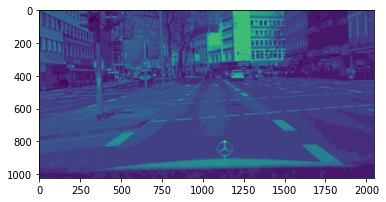

In [3]:
plt.imshow(img)

# To make csv file of ID and Labels

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import yaml
import xmltodict
import json
from tqdm.notebook import tqdm

from pycocotools.coco import COCO

In [ ]:
root_dir = "DTLD/";
img_dir = "cities/";
anno_dir = "annotations/";

In [ ]:
files = os.listdir(root_dir + anno_dir);

In [ ]:
with open('DTLD/annotations/DTLD_all.yml') as f:
    config = yaml.safe_load(f) 

In [ ]:
config

In [ ]:
config[0]['objects'][0]['class_id']

In [ ]:
a=config[9]['path']

In [ ]:
a.split('/')[-1]

In [ ]:
len(config)

In [ ]:
combined = [];
for i in tqdm(range(len(config))):
    fname=config[i]['path'].split('/')[-1]
    label_str = "";
    for j in range(len(config[i]['objects'])):
        label_id=config[i]['objects'][j]['class_id']
        u=str(label_id)
        if u[1]=='0' or u[1]=='2':
            l='Not_Relevent'
        if u[1]=='1' or u[1]=='3':
            l='Relevent'
        if u[4]=='0':
            a=l+'_Off'
        if u[4]=='1':
            a=l+'_Red'
        if u[4]=='2':
            a=l+'_Yellow'
        if u[4]=='3':
            a=l+'_Red_Yellow'
        if u[4]=='4':
            a=l+'_Green'
        if u[5]=='0':
            b=a+'_Circle'
        if u[5]=='1':
            b=a+'_Arrow_Straight'
        if u[5]=='2':
            b=a+'_Arrow_Left'
        if u[5]=='3':
            b=a+'_Arrow_Straight_Left'
        if u[5]=='4':
            b=a+'_Arrow_Right'
        if u[5]=='8':
            b=a+'_Pedestrian'
        if u[5]=='9':
            b=a+'_Cyclist'
        box=config[i]['objects'][j]
        x1=box['x']
        x2=box['x']+box['width']
        y1=box['y']
        y2=box['y']+box['height']
        if(j == len(config[i]['objects'])-1):
            label_str += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + b;
        else:
            label_str += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + b + " ";
    combined.append([fname, label_str])
    print(fname, label_str)

In [ ]:
df = pd.DataFrame(combined, columns = ['ID', 'Label']);
df.to_csv("train_labels.csv", index=False);

# To save images in .xml format

In [ ]:
import os
import numpy as np 
import cv2
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

In [ ]:
# Provide details on directory in Monk Format
root = "drive/";
img_dir = "folder/";
anno_file = "train_labels.csv";

In [ ]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/anno/";

In [ ]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [ ]:
img_dir = "drive/folder/";
anno_file = "drive/train_labels3.csv";

In [ ]:
output_dir = "drive/voc";

import os
if(not os.path.isdir(output_dir)):
    os.mkdir(output_dir)

In [ ]:
df = pd.read_csv(anno_file);

In [ ]:
columns = df.columns

In [ ]:
! pip install numpy pascal-voc-writer pandas opencv-python tqdm

In [ ]:
from pascal_voc_writer import Writer

In [ ]:
for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i].split(" ");
    img = cv2.imread("drive/folder/" + img_name)
    h, w, c = img.shape;
    writer = Writer(img_name, w, h)
    for j in range(len(labels)//5):
        x1 = labels[j*5+0]
        y1 = labels[j*5+1]
        x2 = labels[j*5+2]
        y2 = labels[j*5+3]
        label = labels[j*5+4]
        writer.addObject(label, x1, y1, x2, y2);
    
    writer.save(output_dir + "/" + img_name.split(".")[0] + ".xml")

#  Run training

In [2]:
import os
import sys
sys.path.append("Monk_Object_Detection/12_tf_obj_1/lib/")

In [3]:
import tensorflow as tf
from train_detector import Detector

In [12]:
print(tf.__version__)

1.15.0


In [4]:
gtf = Detector();

In [5]:
gtf.list_models();

1. Model Name: ssd_mobilenet_v1
2. Model Name: ssd_mobilenet_v2
3. Model Name: ssd_mobilenet_v1_ppn
4. Model Name: ssd_mobilenet_v1_fpn
5. Model Name: ssd_resnet50_v1_fpn
6. Model Name: ssd_mobilenet_v1_0.75_depth
7. Model Name: ssd_mobilenet_v1_quantized
8. Model Name: ssd_mobilenet_v1_0.75_depth_quantized
9. Model Name: ssd_mobilenet_v2_quantized
10. Model Name: ssdlite_mobilenet_v2
11. Model Name: ssd_inception_v2
12. Model Name: faster_rcnn_inception_v2
13. Model Name: faster_rcnn_resnet50
14. Model Name: faster_rcnn_resnet50_lowproposals
15. Model Name: rfcn_resnet101
16. Model Name: faster_rcnn_resnet101
17. Model Name: faster_rcnn_resnet101_lowproposals
18. Model Name: faster_rcnn_inception_resnet_v2_atrous
19. Model Name: faster_rcnn_inception_resnet_v2_atrous_lowproposals
20. Model Name: faster_rcnn_nas
21. Model Name: faster_rcnn_nas_lowproposals
22. Model Name: ssd_mobilenet_v2_mnasfpn
23. Model Name: ssd_mobilenet_v3_large
24. Model Name: ssd_mobilenet_v3_small


In [5]:
train_img_dir = "drive/folder";
train_anno_dir = "drive/voc/";
class_list_file = "drive/anno/annotations/classes.txt";

gtf.set_train_dataset(train_img_dir, train_anno_dir, class_list_file, batch_size=24, trainval_split = 0.8)

In [6]:
# Create tf record
gtf.create_tfrecord(data_output_dir="data_tfrecord")

Training tfrecord already present at data_tfrecord/train.record.
Validation tfrecord already present at data_tfrecord/val.record.


In [ ]:
# Model and hyper params

In [7]:
gtf.set_model_params(model_name="ssd_mobilenet_v2")

Model Download
Model name set as ssd_mobilenet_v2_coco_2018_03_29


In [8]:
gtf.set_hyper_params(num_train_steps=10000, lr=0.01)

In [9]:
# Directory to store inference graph
gtf.export_params(output_directory="export_dir");

In [ ]:
# training
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/12_tf_obj_1/lib/train.py
# or
# Run the following command from notebook

In [ ]:
%run Monk_Object_Detection/12_tf_obj_1/lib/train.py

W0914 06:35:13.199035 140014849750848 model_lib.py:758] Forced number of epochs for all eval validations to be 1.


INFO:tensorflow:Maybe overwriting train_steps: 10000


I0914 06:35:13.200528 140014849750848 config_util.py:552] Maybe overwriting train_steps: 10000


INFO:tensorflow:Maybe overwriting use_bfloat16: False


I0914 06:35:13.201534 140014849750848 config_util.py:552] Maybe overwriting use_bfloat16: False


INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1


I0914 06:35:13.202507 140014849750848 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1


INFO:tensorflow:Maybe overwriting eval_num_epochs: 1


I0914 06:35:13.203465 140014849750848 config_util.py:552] Maybe overwriting eval_num_epochs: 1


W0914 06:35:13.204496 140014849750848 model_lib.py:774] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.


INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to_tpu None


I0914 06:35:13.207655 140014849750848 model_lib.py:809] create_estimator_and_inputs: use_tpu False, export_to_tpu None


INFO:tensorflow:Using config: {'_model_dir': 'output_dir/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f570d3826a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0914 06:35:13.209074 140014849750848 estimator.py:212] Using config: {'_model_dir': 'output_dir/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f570d3826a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


W0914 06:35:13.212046 140014849750848 model_fn.py:630] Estimator's model_fn (<function create_model_fn.<locals>.model_fn at 0x7f570d388840>) includes params argument, but params are not passed to Estimator.


INFO:tensorflow:Not using Distribute Coordinator.


I0914 06:35:13.213791 140014849750848 estimator_training.py:186] Not using Distribute Coordinator.


INFO:tensorflow:Running training and evaluation locally (non-distributed).


I0914 06:35:13.214877 140014849750848 training.py:612] Running training and evaluation locally (non-distributed).


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.


I0914 06:35:13.215997 140014849750848 training.py:700] Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


W0914 06:35:13.226799 140014849750848 deprecation.py:323] From /home/ubuntu/.virtualenvs/my_venv/lib/python3.6/site-packages/tensorflow_core/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


W0914 06:35:13.282764 140014849750848 dataset_builder.py:83] num_readers has been reduced to 1 to match input file shards.


Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


W0914 06:35:13.290422 140014849750848 deprecation.py:323] From /home/ubuntu/.virtualenvs/my_venv/lib/python3.6/site-packages/object_detection/builders/dataset_builder.py:100: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


Instructions for updating:
Use `tf.data.Dataset.map()


W0914 06:35:13.321895 140014849750848 deprecation.py:323] From /home/ubuntu/.virtualenvs/my_venv/lib/python3.6/site-packages/object_detection/builders/dataset_builder.py:175: DatasetV1.map_with_legacy_function (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.map()


Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


W0914 06:35:26.946794 140014849750848 deprecation.py:323] From /home/ubuntu/.virtualenvs/my_venv/lib/python3.6/site-packages/object_detection/inputs.py:77: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W0914 06:35:27.072777 140014849750848 deprecation.py:323] From /home/ubuntu/.virtualenvs/my_venv/lib/python3.6/site-packages/object_detection/utils/ops.py:493: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


W0914 06:35:34.876384 140014849750848 api.py:332] From /home/ubuntu/.virtualenvs/my_venv/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:1004: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


Instructions for updating:
Use `tf.cast` instead.


W0914 06:35:39.315591 140014849750848 deprecation.py:323] From /home/ubuntu/.virtualenvs/my_venv/lib/python3.6/site-packages/object_detection/inputs.py:259: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


INFO:tensorflow:Calling model_fn.


I0914 06:35:43.307528 140014849750848 estimator.py:1148] Calling model_fn.


Instructions for updating:
Please use `layer.__call__` method instead.


W0914 06:35:43.895477 140014849750848 deprecation.py:323] From /home/ubuntu/.virtualenvs/my_venv/lib/python3.6/site-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:depth of additional conv before box predictor: 0


I0914 06:35:47.150138 140014849750848 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0914 06:35:47.188789 140014849750848 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0914 06:35:47.229307 140014849750848 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0914 06:35:47.269501 140014849750848 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0914 06:35:47.309513 140014849750848 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0914 06:35:47.349305 140014849750848 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# exportaing trained model
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/12_tf_obj_1/lib/export.py
# or
# Run the following command from notebook

In [ ]:
%run Monk_Object_Detection/12_tf_obj_1/lib/export.py

# Inference

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
gtf.set_model_params('export_dir/frozen_inference_graph.pb', "drive/anno/annotations/classes.txt")

In [ ]:
scores, bboxes, labels = gtf.infer_on_image('test/DE_BBBR667_2015-04-23_13-43-37-369424_k0.jpg', thresh=0.1, 
                                            bbox_thickness=3, text_size=2, text_thickness=4);
from IPython.display import Image
Image(filename='output.png')